In [1]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
%matplotlib inline

In [2]:
path = '/data/kanferg/Sptial_Omics/playGround/pysal_data'
gdf = gpd.read_file(os.path.join(path,'berlin-neighbourhoods.geojson'))

In [3]:
bl_df = pd.read_csv(os.path.join(path,'berlin-listings.csv'))
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
crs = {'init': 'epsg:4326'}
bl_gdf = GeoDataFrame(bl_df, crs=crs, geometry=geometry)

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy-voyagerpy/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [4]:
bl_gdf['price'] = bl_gdf['price'].astype('float32')
sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_group']]).mean()
median_price_gb

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy-voyagerpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_1885351/2088274488.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')


neighbourhood_group
Charlottenburg-Wilm.        58.556408
Friedrichshain-Kreuzberg    55.492809
Lichtenberg                 44.584270
Marzahn - Hellersdorf       54.246754
Mitte                       60.387890
Neukölln                    45.135948
Pankow                      60.282516
Reinickendorf               43.682465
Spandau                     48.236561
Steglitz - Zehlendorf       54.445683
Tempelhof - Schöneberg      53.704407
Treptow - Köpenick          51.222004
Name: price, dtype: float32

In [5]:
gdf = gdf.join(median_price_gb, on='neighbourhood_group')
gdf.rename(columns={'price': 'median_pri'}, inplace=True)
gdf.head(15)

,neighbourhood,neighbourhood_group,geometry,median_pri
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004
5,Biesdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.56643 52.53510, 13.56697 52...",54.246754
6,Nord 1,Reinickendorf,"MULTIPOLYGON (((13.33669 52.62265, 13.33663 52...",43.682465
7,West 5,Reinickendorf,"MULTIPOLYGON (((13.28138 52.59958, 13.28158 52...",43.682465
8,Frankfurter Allee Nord,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.45320 52.51682, 13.45321 52...",55.492809
9,Buch,Pankow,"MULTIPOLYGON (((13.46449 52.65055, 13.46457 52...",60.282516


In [6]:
pd.isnull(gdf['median_pri']).sum()
gdf['median_pri'].fillna((gdf['median_pri'].mean()), inplace=True)

In [7]:
gdf.head(15)

,neighbourhood,neighbourhood_group,geometry,median_pri
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004
5,Biesdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.56643 52.53510, 13.56697 52...",54.246754
6,Nord 1,Reinickendorf,"MULTIPOLYGON (((13.33669 52.62265, 13.33663 52...",43.682465
7,West 5,Reinickendorf,"MULTIPOLYGON (((13.28138 52.59958, 13.28158 52...",43.682465
8,Frankfurter Allee Nord,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.45320 52.51682, 13.45321 52...",55.492809
9,Buch,Pankow,"MULTIPOLYGON (((13.46449 52.65055, 13.46457 52...",60.282516


In [10]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq

/tmp/ipykernel_1885351/3802415010.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(df)


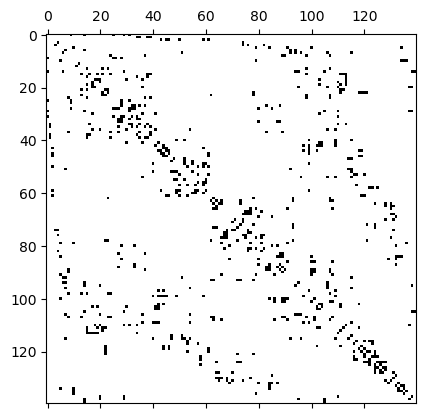

In [9]:
plt.spy(wq.sparse.toarray())

In [ ]:
wq.transform = 'r'